In [1]:
import datetime

import pandas as pd
import numpy as np

np.random.seed(0)

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold, train_test_split, KFold
from sklearn.metrics import f1_score,mean_squared_error

import lightgbm as lgb

from hyperopt import hp, tpe, Trials
from hyperopt.fmin import fmin

from tqdm import tqdm

In [2]:
train_df_balanced = pd.read_csv('train_df_final.csv')
test_df = pd.read_csv('test_df_final.csv')
train_df = pd.read_csv('train_df_final_blanced.csv')
submission_df = pd.read_csv('sample_submission.csv')

In [3]:
train_df = train_df.fillna(value=0)
train_df_balanced = train_df_balanced.fillna(value=0)
test_df = test_df.fillna(value=0)

In [4]:
def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat,average='micro'), True

# Classifier

In [5]:
features = test_df.columns
df_train_X = train_df[features]
df_test_X = test_df[features]
df_train_balanced_X = train_df_balanced[features]
y = train_df['label'].values
y_balanced = train_df_balanced['label'].values

In [6]:
params = {
    'objective':'binary',
    'learning_rate':0.05,
    'seed':0,
    'metric':'f1'
}

In [7]:
validation_scores = []
balanced_scores = []
models = []
folds = 3
skf = StratifiedKFold(n_splits=folds)
preds = np.zeros(df_test_X.shape[0])
for train_index, test_index in skf.split(df_train_X, y):
    X_train, X_test = df_train_X.iloc[train_index,:], df_train_X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    train = lgb.Dataset(X_train,y_train)
    valid = lgb.Dataset(X_test,y_test)
    evals_result = {}
    model = lgb.train(params, train,num_boost_round=1000,early_stopping_rounds=50, valid_sets=valid,feval=lgb_f1_score, evals_result=evals_result,verbose_eval=True)
    validation_scores.append(f1_score(y_test,np.round(model.predict(X_test)),average='micro'))
    balanced_scores.append(f1_score(y_balanced,np.round(model.predict(df_train_balanced_X)),average='micro'))
    models.append(model)
    preds += np.round(model.predict(df_test_X))

[1]	valid_0's f1: 0.666623
Training until validation scores don't improve for 50 rounds
[2]	valid_0's f1: 0.666623
[3]	valid_0's f1: 0.666623
[4]	valid_0's f1: 0.666623
[5]	valid_0's f1: 0.666623
[6]	valid_0's f1: 0.800026
[7]	valid_0's f1: 0.829815
[8]	valid_0's f1: 0.832794
[9]	valid_0's f1: 0.837715
[10]	valid_0's f1: 0.838104
[11]	valid_0's f1: 0.837974
[12]	valid_0's f1: 0.838492
[13]	valid_0's f1: 0.838233
[14]	valid_0's f1: 0.838104
[15]	valid_0's f1: 0.838622
[16]	valid_0's f1: 0.838492
[17]	valid_0's f1: 0.839399
[18]	valid_0's f1: 0.840176
[19]	valid_0's f1: 0.839788
[20]	valid_0's f1: 0.83927
[21]	valid_0's f1: 0.840435
[22]	valid_0's f1: 0.840565
[23]	valid_0's f1: 0.84186
[24]	valid_0's f1: 0.84173
[25]	valid_0's f1: 0.842378
[26]	valid_0's f1: 0.843285
[27]	valid_0's f1: 0.843673
[28]	valid_0's f1: 0.843673
[29]	valid_0's f1: 0.844062
[30]	valid_0's f1: 0.845875
[31]	valid_0's f1: 0.847818
[32]	valid_0's f1: 0.847947
[33]	valid_0's f1: 0.848724
[34]	valid_0's f1: 0.848465

[176]	valid_0's f1: 0.976425
[177]	valid_0's f1: 0.976425
[178]	valid_0's f1: 0.976425
[179]	valid_0's f1: 0.976425
[180]	valid_0's f1: 0.976425
[181]	valid_0's f1: 0.976813
[182]	valid_0's f1: 0.976684
[183]	valid_0's f1: 0.976684
[184]	valid_0's f1: 0.976684
[185]	valid_0's f1: 0.976813
[186]	valid_0's f1: 0.976813
[187]	valid_0's f1: 0.976813
[188]	valid_0's f1: 0.977073
[189]	valid_0's f1: 0.977202
[190]	valid_0's f1: 0.977202
[191]	valid_0's f1: 0.97772
[192]	valid_0's f1: 0.97772
[193]	valid_0's f1: 0.977979
[194]	valid_0's f1: 0.977979
[195]	valid_0's f1: 0.978497
[196]	valid_0's f1: 0.978497
[197]	valid_0's f1: 0.978368
[198]	valid_0's f1: 0.978756
[199]	valid_0's f1: 0.978497
[200]	valid_0's f1: 0.978497
[201]	valid_0's f1: 0.978627
[202]	valid_0's f1: 0.978497
[203]	valid_0's f1: 0.978497
[204]	valid_0's f1: 0.978627
[205]	valid_0's f1: 0.978627
[206]	valid_0's f1: 0.979016
[207]	valid_0's f1: 0.979016
[208]	valid_0's f1: 0.979145
[209]	valid_0's f1: 0.979016
[210]	valid_0's 

[460]	valid_0's f1: 0.98601
[461]	valid_0's f1: 0.98601
[462]	valid_0's f1: 0.98601
[463]	valid_0's f1: 0.98601
[464]	valid_0's f1: 0.98614
[465]	valid_0's f1: 0.986269
[466]	valid_0's f1: 0.98614
[467]	valid_0's f1: 0.98601
[468]	valid_0's f1: 0.98601
[469]	valid_0's f1: 0.98601
[470]	valid_0's f1: 0.985881
[471]	valid_0's f1: 0.985881
[472]	valid_0's f1: 0.98601
[473]	valid_0's f1: 0.98601
[474]	valid_0's f1: 0.985881
[475]	valid_0's f1: 0.985881
[476]	valid_0's f1: 0.985881
[477]	valid_0's f1: 0.985881
[478]	valid_0's f1: 0.98601
[479]	valid_0's f1: 0.98601
[480]	valid_0's f1: 0.98601
[481]	valid_0's f1: 0.98601
Early stopping, best iteration is:
[431]	valid_0's f1: 0.986399
[1]	valid_0's f1: 0.66671
Training until validation scores don't improve for 50 rounds
[2]	valid_0's f1: 0.66671
[3]	valid_0's f1: 0.66671
[4]	valid_0's f1: 0.66671
[5]	valid_0's f1: 0.66671
[6]	valid_0's f1: 0.802202
[7]	valid_0's f1: 0.895984
[8]	valid_0's f1: 0.909326
[9]	valid_0's f1: 0.912565
[10]	valid_0's

[263]	valid_0's f1: 0.982772
[264]	valid_0's f1: 0.982642
[265]	valid_0's f1: 0.982642
[266]	valid_0's f1: 0.982513
[267]	valid_0's f1: 0.982513
[268]	valid_0's f1: 0.982642
[269]	valid_0's f1: 0.982772
[270]	valid_0's f1: 0.982642
[271]	valid_0's f1: 0.982772
[272]	valid_0's f1: 0.983031
[273]	valid_0's f1: 0.983031
[274]	valid_0's f1: 0.983031
[275]	valid_0's f1: 0.983031
[276]	valid_0's f1: 0.982902
[277]	valid_0's f1: 0.983161
[278]	valid_0's f1: 0.983161
[279]	valid_0's f1: 0.983161
[280]	valid_0's f1: 0.98329
[281]	valid_0's f1: 0.98329
[282]	valid_0's f1: 0.98329
[283]	valid_0's f1: 0.98329
[284]	valid_0's f1: 0.98329
[285]	valid_0's f1: 0.983161
[286]	valid_0's f1: 0.983161
[287]	valid_0's f1: 0.98329
[288]	valid_0's f1: 0.98342
[289]	valid_0's f1: 0.98342
[290]	valid_0's f1: 0.98329
[291]	valid_0's f1: 0.983031
[292]	valid_0's f1: 0.983031
[293]	valid_0's f1: 0.983031
[294]	valid_0's f1: 0.983031
[295]	valid_0's f1: 0.983161
[296]	valid_0's f1: 0.983031
[297]	valid_0's f1: 0.9

In [8]:
np.mean(validation_scores), np.std(validation_scores), np.min(validation_scores)

(0.9427522766677874, 0.06044795273096562, 0.8572723740448128)

In [9]:
np.mean(balanced_scores), np.std(balanced_scores), np.min(balanced_scores)

(0.9743030588790004, 0.026925071071748897, 0.9362291507043083)

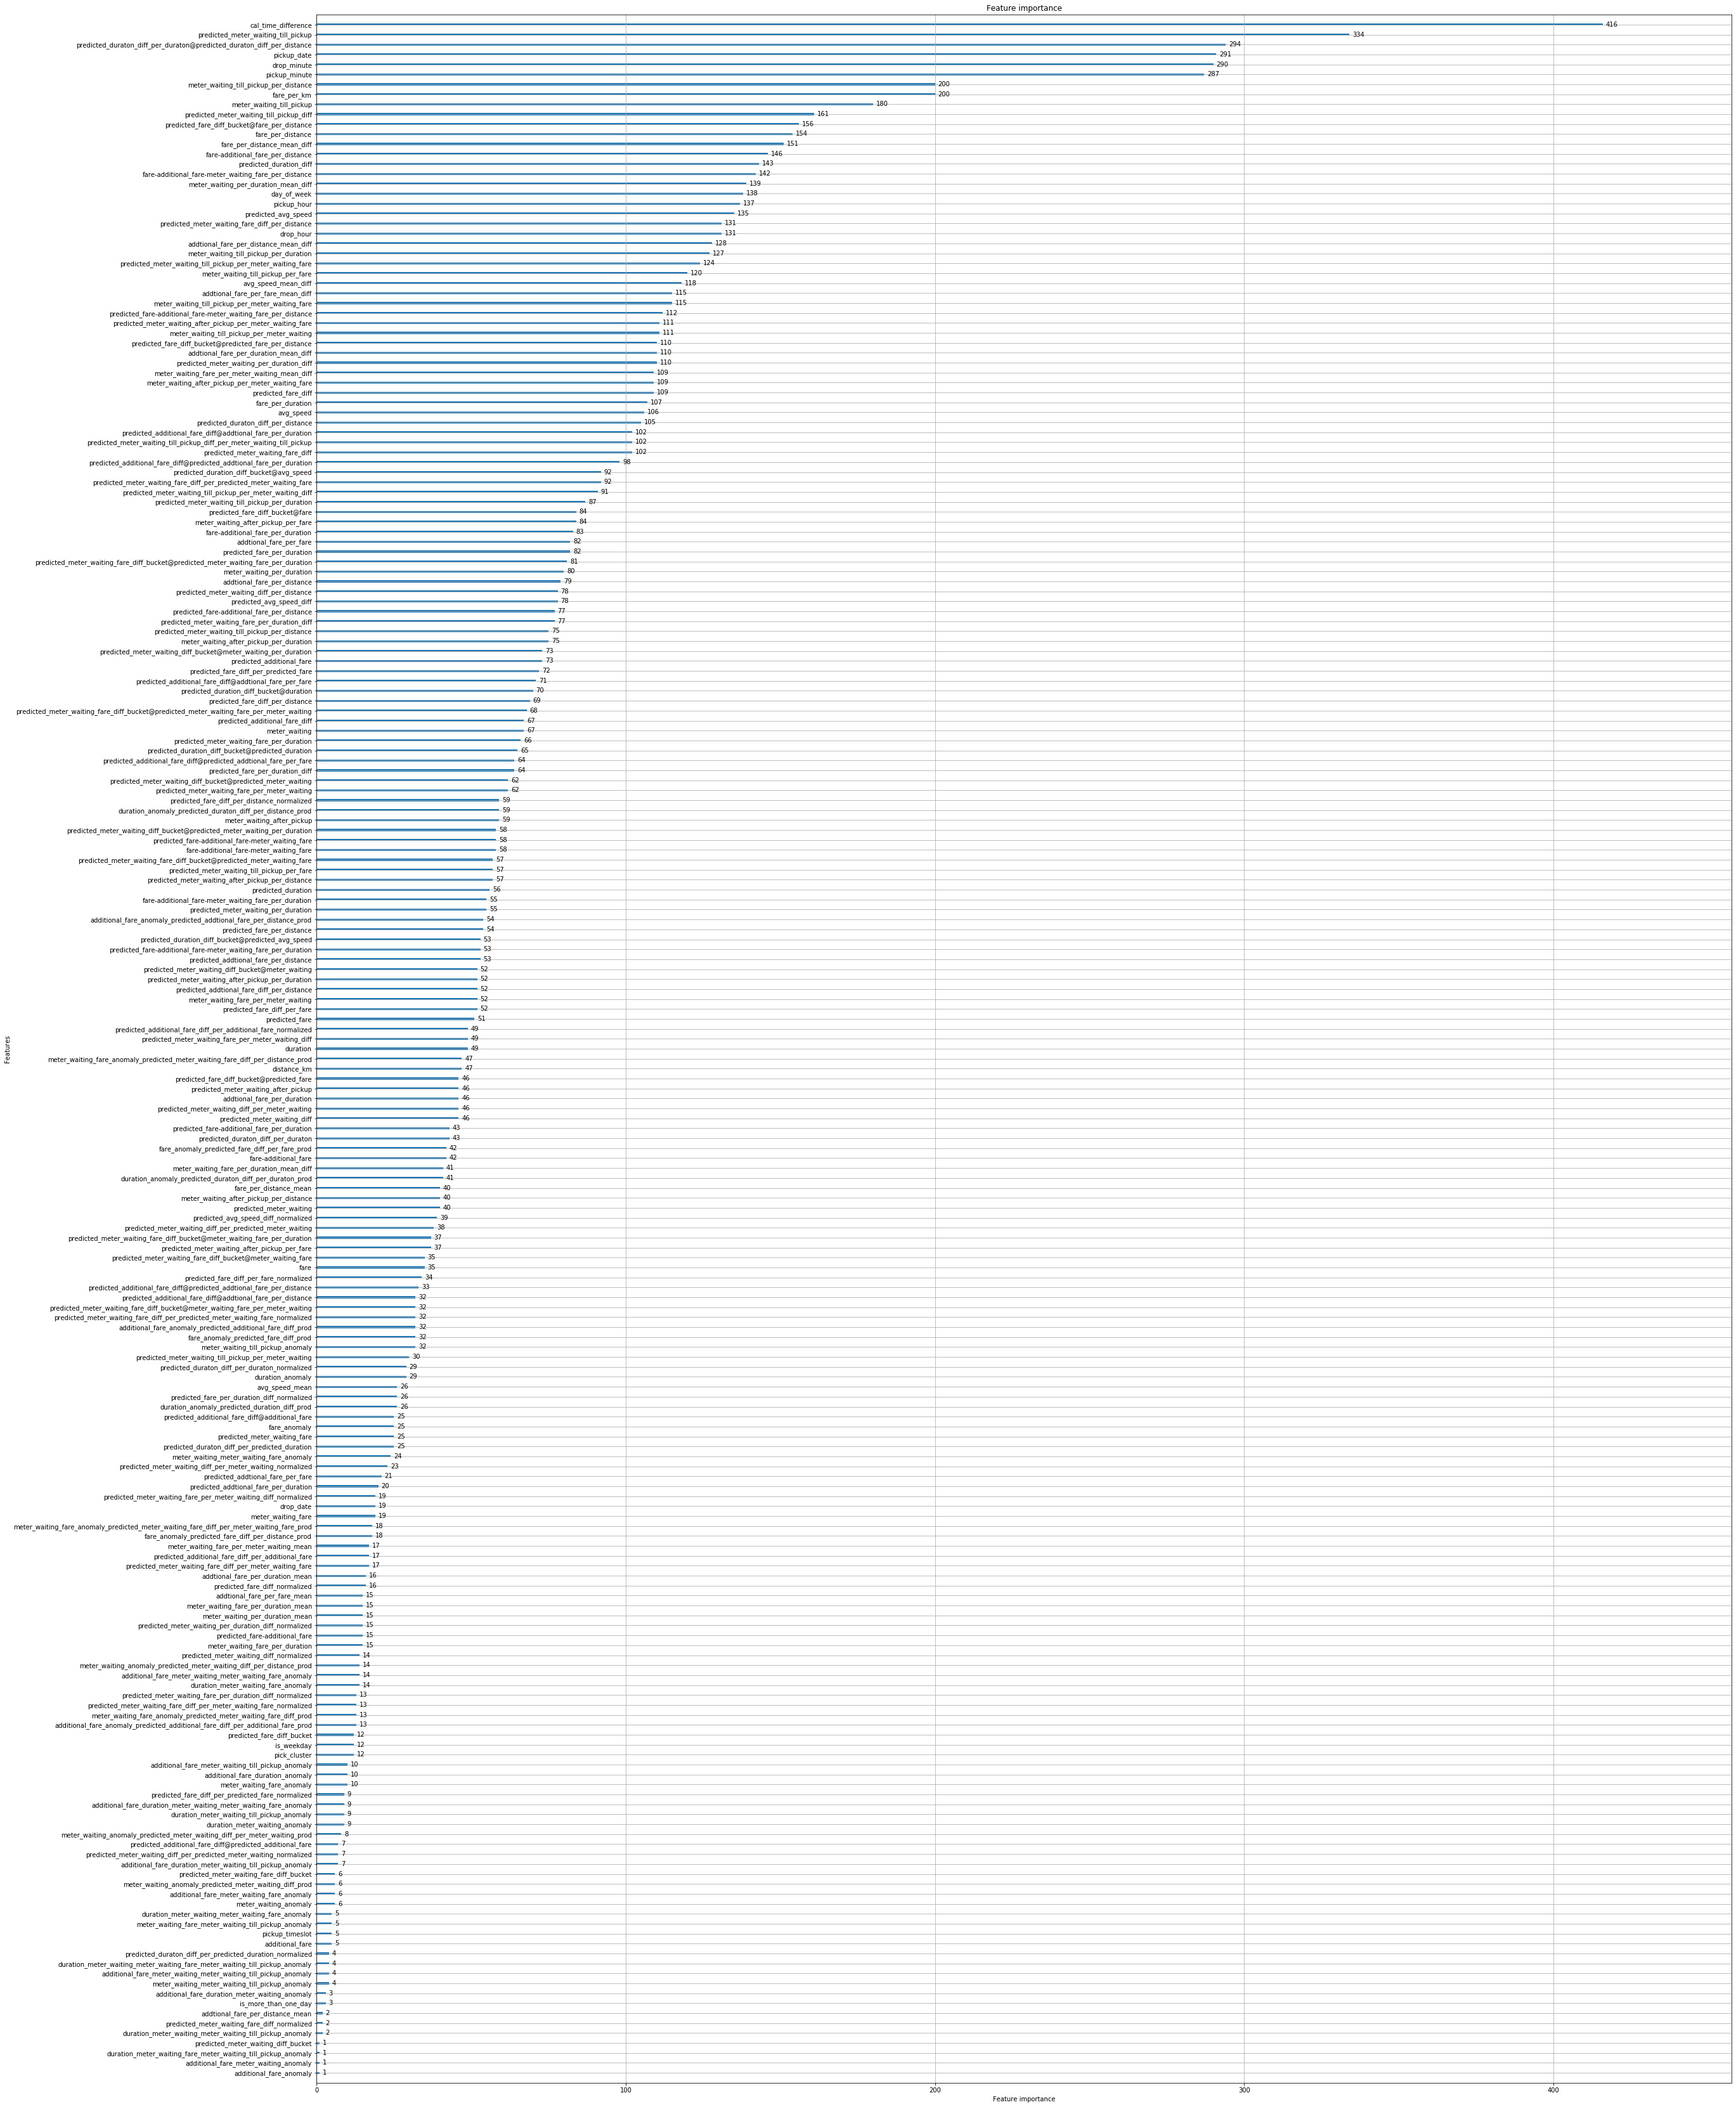

In [10]:
best_model = models[np.argmax(validation_scores)]

fig, ax = plt.subplots(figsize=(40, 60))
lgb.plot_importance(best_model,ax=ax)

In [11]:
submission_df['prediction'] = np.where(preds > 2.0, 1, 0)
submission_df['prediction'].sum() / submission_df.shape[0]

0.925839552238806

In [12]:
submission_df.to_csv('submission.csv',index=False)